## Purpose: Model Comparison

Demonstration: 
1. Parameter fit
2. Use of Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

numpy.random.seed( 864 )
y = ym + sig * numpy.random.randn( N )


Fit polynomial models of increasing degree. Calculate the evidence to see which one is the best model.

Polynomial degree  0   blue
Fit params           3.209
    stdev            0.815
    chisq          278.719
    evidence       -29.669
Polynomial degree  1   green
Fit params       [    2.140    2.139]
    stdev        [    0.404    0.253]
    chisq           58.619
    evidence       -25.412
Polynomial degree  2   red
Fit params       [    0.630    1.399    0.739]
    stdev        [    0.244    0.138    0.082]
    chisq           10.701
    evidence       -21.400
Polynomial degree  3   mint
Fit params       [    1.140    0.512    0.344    0.264]
    stdev        [    0.029    0.027    0.013    0.007]
    chisq            0.116
    evidence        -7.825
Polynomial degree  4   magenta
Fit params       [    1.139    0.510    0.346    0.265   -0.000]
    stdev        [    0.033    0.040    0.027    0.013    0.005]
    chisq            0.116
    evidence       -12.019
Polynomial degree  5   yellow
Fit params       [    1.151    0.495    0.318    0.278    0.006   -0.003]
    stdev        

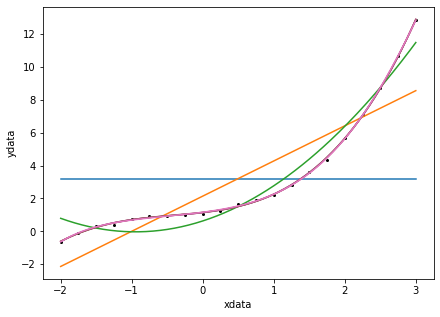

In [4]:
plotFit( x, y, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

Plot the evidence as function of the polynomial degree. The plot peaks at 3. Before that point the fit really improves. Afterwards the fit stays more or less the same, but the penalty for introducing an extra parameter make the evidence turn downward.

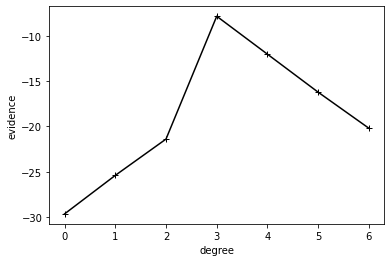

In [5]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()